The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [1]:
!pip install d2l==0.14.3


     |████████████████████████████████| 61kB 2.2MB/s 


# Concise Implementation of Multilayer Perceptrons
:label:`sec_mlp_concise`

As you might expect, by relying on the high-level APIs,
we can implement MLPs even more concisely.


In [2]:
from d2l import tensorflow as d2l
import tensorflow as tf

## Model

As compared with our concise implementation
of softmax regression implementation
(:numref:`sec_softmax_concise`),
the only difference is that we add
*two* fully-connected layers
(previously, we added *one*).
The first is our hidden layer,
which contains 256 hidden units
and applies the ReLU activation function.
The second is our output layer.


In [3]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

The training loop is exactly the same
as when we implemented softmax regression.
This modularity enables us to separate
matters concerning the model architecture
from orthogonal considerations.


In [4]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

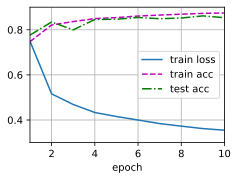

In [5]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

#Own Implementation

Own implementation using `TensorFlow API` instead of `D2L API`

[Dataset splitting documentation](https://www.tensorflow.org/datasets/splits)

[List of TF datasets](https://www.tensorflow.org/datasets/catalog/overview#all_datasets)

In [6]:
import tensorflow_datasets as tfds

In `tfds.load()` setting `as_supervised` to `True` would yield a dataset in tuple format. In this case, the tuple would be `(image, label)`. It needs to be set to `True` because `model.fit()` expects the `dataset` to be in this format.

In [7]:
train_ds, test_ds = tfds.load(name = "fashion_mnist", split = ["train", "test"],batch_size= batch_size, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteQEB1VH/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteQEB1VH/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

In [9]:
model.compile(optimizer= trainer, loss = loss, metrics=['accuracy'])

In [10]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [11]:
tf.__version__

'2.3.0'

In [12]:
train_ds.element_spec

(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [13]:
trained_net = model.fit(train_ds,batch_size=batch_size, epochs= num_epochs)

Epoch 1/10
235/235 [==============================] - 10s 41ms/step - loss: 2233485.2500 - accuracy: 0.1001
Epoch 2/10
235/235 [==============================] - 10s 41ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 3/10
235/235 [==============================] - 10s 41ms/step - loss: 2.3026 - accuracy: 0.0983
Epoch 4/10
235/235 [==============================] - 10s 41ms/step - loss: 2.3026 - accuracy: 0.0981
Epoch 5/10
235/235 [==============================] - 10s 41ms/step - loss: 2.3026 - accuracy: 0.0981
Epoch 6/10
235/235 [==============================] - 10s 41ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 8/10
235/235 [==============================] - 10s 42ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 9/10
235/235 [==============================] - 10s 42ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 10/10
235/235 [==============================] - 10s 41ms/step - loss:

In [15]:
testLoss, testAcc = model.evaluate(test_ds, batch_size=batch_size)

40/40 [==============================] - 1s 36ms/step - loss: 2.3036 - accuracy: 0.1000


In [25]:
extrain, extest = tf.keras.datasets.fashion_mnist.load_data()

In [31]:
print(len(extrain[0]))
print(len(extrain[1]))
print(len(extest[0]))
print(len(extest[1]))

60000
60000
10000
10000


## Summary

* Using high-level APIs, we can implement MLPs much more concisely.
* For the same classification problem, the implementation of an MLP is the same as that of softmax regression except for additional hidden layers with activation functions.

## Exercises

1. Try adding different numbers of hidden layers (you may also modify the learning rate). What setting works best? 
1. Try out different activation functions. Which one works best?
1. Try different schemes for initializing the weights. What method works best?


[Discussions](https://discuss.d2l.ai/t/262)
